### ***Problem01: Aminer basic dataset analysis***

    https://lfs.aminer.cn/lab-datasets/citation/acm.v9.zip

In [31]:
### A: Compute the number of distinct authors, publication venues, publications, and citations/references
# Import Drive
from google.colab import drive
drive.mount("/content/drive") 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
### Import data 
# Data Set
authors = set()
venues = set()
publications = set()
references = set()
index = ""
# Scrap
with open("/content/drive/MyDrive/DS5230_Unsupervised Machine Learning/Assignments/HW01/Aminer.txt", 'r+', newline="", encoding="utf8") as document:
    for line in document:    
      if line.startswith("#@"):
        authors.add(line)
      elif line.startswith("#c"):
        venues.add(line) 
      elif line.startswith("#*"):
        publications.add(line) 
      elif line.startswith("#%"):
        references.add(line) 

# A Answer
print("Total num of Authors: " , len(authors))
print("Total num of Venues: " , len(venues))
print("Total num of Publications: " , len(publications))
print("Total num of Citations/Referenes: " , len(references))

Total num of Authors:  1670785
Total num of Venues:  273329
Total num of Publications:  2183551
Total num of Citations/Referenes:  1007495


In [33]:
### B: Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases” – what do you notice?
# Venue Temp set 
temp_venue = set()
Aminer = "/content/drive/MyDrive/DS5230_Unsupervised Machine Learning/Assignments/HW01/Aminer.txt" 
with open(Aminer, "r+", newline="", encoding="utf8") as document:
  for line in document:
    if line.startswith("#c"):
      if "Principles and Practice of Knowledge Discovery in Databases" in line:
        ven = line[2:]
        temp_venue.add(ven) 
for venue in temp_venue: 
  print(venue)

PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases

PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases

Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)

PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases

Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)



In [34]:
# B Answer
"""
The count number does not seems accurate. Even though the publication is same, it has difference names.
Therefore, the number of counts will not be accurate.  
"""

'\nThe count number does not seems accurate. Even though the publication is same, it has difference names.\nTherefore, the number of counts will not be accurate.  \n'

In [35]:
### C: For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)
# Author Dictionary
authors = {}
Aminer = "/content/drive/MyDrive/DS5230_Unsupervised Machine Learning/Assignments/HW01/Aminer.txt" 
with open(Aminer, "r+", newline="", encoding="utf8") as document: 
  for line in document:
    if line.startswith("#@"):
      author = line[2:]
      if authors.get(author) == None:
        authors[author] = 1
      else:
        authors[author] += 1
# Set Author & Publications 
Author = list(authors.keys())
publications = list(authors.values())

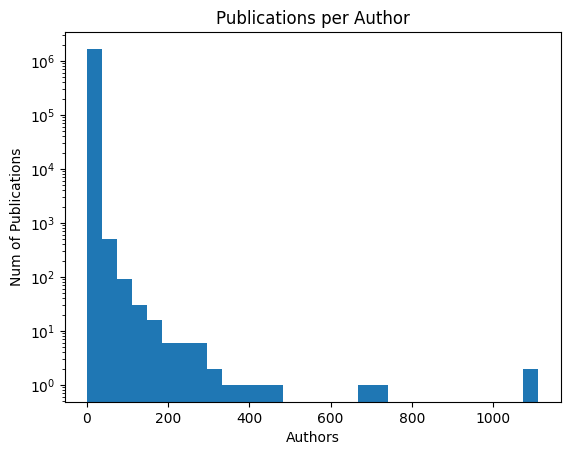

In [36]:
# Plot Publications per Author 
import math 
plt.xlabel("Authors")
plt.ylabel("Num of Publications") 
plt.title("Publications per Author") 
plt.hist(publications, bins=30, log=True) 
plt.show() 

In [37]:
### D: Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.
print("Mean: ", np.mean(publications)) 
print("Standard Deviation: ", np.std(publications))
print("Q1: ", np.percentile(publications, 25)) 
print("Median: ", np.median(publications))
print("Q3: ", np.percentile(publications, 75))

Mean:  1.33709124752736
Standard Deviation:  2.564932844373579
Q1:  1.0
Median:  1.0
Q3:  1.0


In [38]:
# D Answer
"""
Because the 1st quartile and 3rd quartile have even distribution, the median value is 1.
However, the Mean value is 1.33 that bigger than Median value because of the Standard Deviation value, which point is 2.5 
"""

'\nBecause the 1st quartile and 3rd quartile have even distribution, the median value is 1.\nHowever, the Mean value is 1.33 that bigger than Median value because of the Standard Deviation value, which point is 2.5 \n'

In [39]:
### E: Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?
# Publications Dictionary per venue
venues = {}
Aminer = "/content/drive/MyDrive/DS5230_Unsupervised Machine Learning/Assignments/HW01/Aminer.txt" 
with open(Aminer, "r+", newline="", encoding="utf8") as document: 
  for line in document:
    if line.startswith("#c"):
      venue = line[2:]
      if venues.get(venue) == None:
        venues[venue] = 1
      else:
        venues[venue] += 1
# Set Venues & Publications 
Venues = list(venues.keys())
publications = list(venues.values())

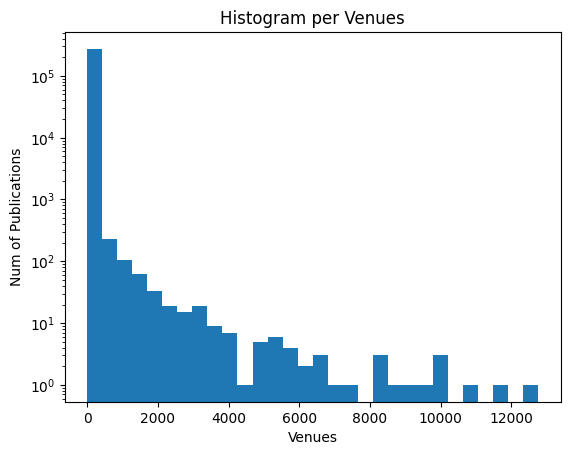

In [40]:
# Plot the Publications per Venues
plt.xlabel("Venues")
plt.ylabel("Num of Publications")
plt.title("Histogram per Venues")
plt.hist(publications, bins=30, log = True)
plt.show()

In [41]:
# Answer E
max_pub = max(venues, key=venues.get)
print("The largest num of publications: ", max_pub)

The largest num of publications:  IEEE Transactions on Information Theory



In [42]:
### F: Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?
index = 0
publications = {}
references = {}
citations = {} 
cite_venue_num = {}
Aminer = "/content/drive/MyDrive/DS5230_Unsupervised Machine Learning/Assignments/HW01/Aminer.txt" 
with open(Aminer, "r+", newline="", encoding="utf8") as document: 
  for line in document:
    # Get the index 
    if line.startswith("#index"):
      index = int(line[6:])
    # Set the citation
    elif line.startswith("#c"): 
      citation = line[2:] 
      if citations.get(citation) == None:
        citations[citation] = 1
      else:
        citations[citation] += 1
      venue = line[2:] 
      if publications.get(venue) == None:
        publications[venue] = index 
    # Get the number of References 
    if line.startswith("#%"):
      if references.get(index) == None:
        references[index] = 1
      else:
        references[index] += 1

      cite_venue = publications.get(venue) 
      if cite_venue_num.get(cite_venue) == None: 
        cite_venue_num[cite_venue] = 1
      else:
        cite_venue_num[cite_venue] += 1

In [43]:
# The largeset number of References and Citations
print("Index, Max_references:" , list(references.keys())[list(references.values()).index(max(list(references.values())))] ,max(list(references.values())))
print("Index,  Max_citations:" , list(cite_venue_num.keys())[list(cite_venue_num.values()).index(max(list(cite_venue_num.values())))] ,max(list(cite_venue_num.values())))       

Index, Max_references: 2015217 809
Index,  Max_citations: 70759 90497


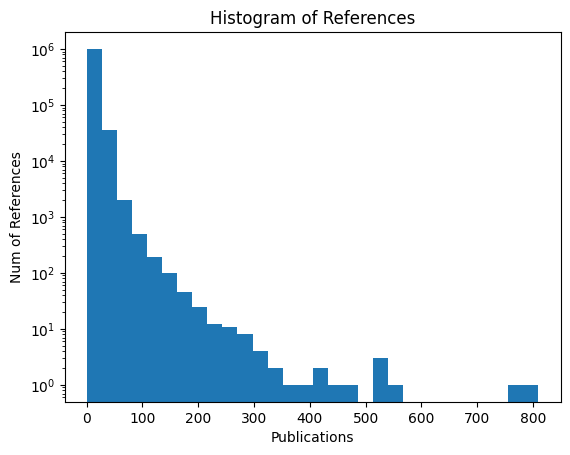

In [44]:
# Plot References
plt.xlabel("Publications")
plt.ylabel("Num of References")
plt.title('Histogram of References')
plt.hist(list(references.values()),bins=30,log=True)
plt.show()

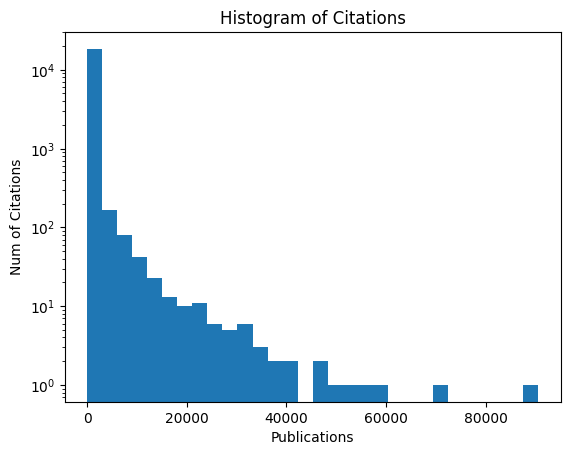

In [45]:
# Plot Citations
plt.xlabel("Publications")
plt.ylabel("Num of Citations")
plt.title("Histogram of Citations")
plt.hist(list(cite_venue_num.values()), bins=30, log=True)
plt.show()

In [46]:
### Answer F
"""
Both the number of references and citations are not make sense. 
There are too many numbers of references and citations in the perspective of common sense.
"""

'\nBoth the number of references and citations are not make sense. \nThere are too many numbers of references and citations in the perspective of common sense.\n'

In [47]:
### G: Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results 
index = 0
publications = {}
references = {}
citations = {} 
cite_venue_num = {}
Aminer = "/content/drive/MyDrive/DS5230_Unsupervised Machine Learning/Assignments/HW01/Aminer.txt" 
with open(Aminer, "r+", newline="", encoding="utf8") as document: 
  for line in document:
    # Get the index 
    if line.startswith("#index"):
      index = int(line[6:])
    # Set the citation
    elif line.startswith("#c"): 
      venue = line[2:] 
      if publications.get(index) == None:
        publications[index] = venue
    # Get the number of References 
    if line.startswith("#%"):
      cite_venue = publications.get(int(line[2:])) 
      if cite_venue_num.get(cite_venue) == None: 
        cite_venue_num[cite_venue] = 1
      else:
        cite_venue_num[cite_venue] += 1

In [48]:
# Get impact facotr 
publications = {}
citations = {}
Aminer = "/content/drive/MyDrive/DS5230_Unsupervised Machine Learning/Assignments/HW01/Aminer.txt" 
# Get the total number of citations for the publications 
with open(Aminer, "r+", newline="", encoding="utf8") as document: 
  for line in document:
    if line.startswith("#c"):
      citation = line[2:] 
      if citations.get(citation) == None:
        citations[citation] = 1
      else:
        citations[citation] += 1
sum = 0
for i in citations.values():
  sum += i 
# Get number of impact per publication                    
impact_factors = {}
with open(Aminer, "r+", newline="", encoding="utf8") as document: 
  for line in document:
    if line.startswith("#c"):
      citation = line[2:] 
      if impact_factors.get(citation) == None:
        impact_factors[citation] = 1
      else:
        impact_factors[citation] += 1
# Calculate impact per 
factors = {}
for i in cite_venue_num.keys():
  factor = int(sum) / int(cite_venue_num[i])
  if factors.get(i) == None:
    factors[i] = factor

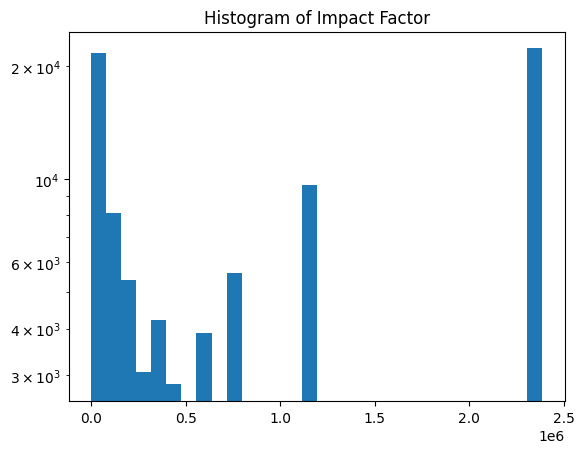

In [49]:
# Plot impact
plt.title('Histogram of Impact Factor')
plt.hist(list(factors.values()),bins=30,log=True)
plt.show()

In [50]:
### H: What is the venue with the highest apparent impact factor? Do you believe this number?
list(factors.keys())[list(factors.values()).index(max(list(factors.values())))]

'Programming in MODULA-2 (3rd corrected ed.)\n'

In [51]:
# Answer H 
"""
Since we know that both number of citations and references are not make sense from F,
also each name of citations and references are written differently even they are same. 
Therefore, it is difficult to believe that the results are accurate. 
"""

'\nSince we know that both number of citations and references are not make sense from F,\nalso each name of citations and references are written differently even they are same. \nTherefore, it is difficult to believe that the results are accurate. \n'

In [52]:
### I: Now repeat the calculation from item C, but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?
# Proceed E first to calculate 
# Not Item C but G
factors = {}
for citation in cite_venue_num.keys():   
    factors[citation] = 0    
    if citation != 'None' and venues.get(citation) != None and venues[citation] > 10:
        factors[citation] = cite_venue_num[citation]/venues[citation]

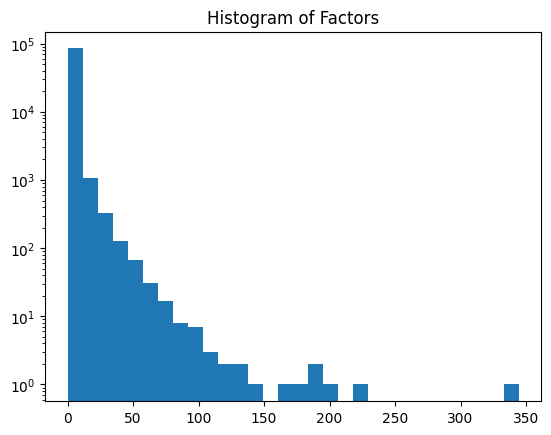

In [53]:
# Plot 
plt.title('Histogram of Factors')
plt.hist(list(factors.values()),bins=30,log= True)
plt.show()

In [54]:
# Answer I 
citations_median = list(venues.values())
citations_median = np.median(citations_median)
mean_factors = list(factors.values())
mean_factors = np.mean(mean_factors)
print("Median of number of citations", citations_median)
print("Mean of factors", mean_factors)
"""
Histogram has been changed and the number of citations is skewed to the left side.
And mean number of impact factor and the median number of citations are quite similar.  
"""

Median of number of citations 1.0
Mean of factors 1.043566245741203


'\nHistogram has been changed and the number of citations is skewed to the left side.\nAnd mean number of impact factor and the median number of citations are quite similar.  \n'

In [55]:
### J: Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.
# import Data
import collections 
publication_year = {}
average = {}
venues = {}
ref = {}
year = 0 
index = 0 
Aminer = "/content/drive/MyDrive/DS5230_Unsupervised Machine Learning/Assignments/HW01/Aminer.txt" 
# index venue & refernce
with open(Aminer, "r+", newline="", encoding="utf8") as document: 
  for line in document:
    if line.startswith("#index"):
      index = int(line[6:]) 
    elif line.startswith("#%"):
      if ref.get(index) == None:
        ref[index] = 1
      else:
        ref[index] += 1
      if venues.get(int(line[2:].strip())) == None:
        venues[int(line[2:].strip())] = 1
      else:
        venues[int(line[2:].strip())] += 1
# import data for publication_year 
with open(Aminer, "r+", newline="", encoding="utf8") as document: 
  for line in document:
    if line.startswith("#index"):
      index = int(line[6:]) 
# Average number of references & citations per year(publication) 
    elif line.startswith("#t"):
      year = int(line[2:]) 
      if publication_year.get(year) == None:
        publication_year[year] = {"publication":0, "references":0, "citations":0}
        publication_year[year]["publication"] = 1
        if venues.get(index) != None: 
          publication_year[year]["citations"] = venues.get(index) 
        if ref.get(index) != None: 
          publication_year[year]["references"] = ref.get(index) 
      else: 
        publication_year[year]["publication"] += 1
        if venues.get(index) != None:
          publication_year[year]["citations"] += venues.get(index) 
        if ref.get(index) != None: 
          publication_year[year]["references"] += ref.get(index) 
# Calculate average 
for year in publication_year.keys():
  average[year] = {} 
  average[year]["citations"] = publication_year[year]["citations"] / publication_year[year]["publication"]
  average[year]["references"] = publication_year[year]["references"] / publication_year[year]["publication"]    
  average = collections.OrderedDict(sorted(average.items())) 

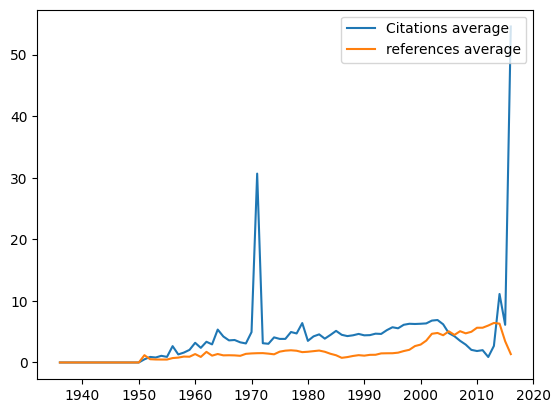

In [56]:
# Plot 
x = list(average.keys()) 
y1 = [] 
y2 = []
for i in average.keys():
  y1.append(average[i]["citations"])
  y2.append(average[i]["references"]) 
fig, ax = plt.subplots() 
plt.plot(x, y1, label="Citations average")
plt.plot(x, y2, label="references average") 
legned = ax.legend(loc="upper right") 
plt.show() 

In [57]:
### Answer J
"""
Excluding the outliers of the nuber of citations average in 2015, the number of citations is higher than the number of references
until 2005. However, after 2005, the number of refernecs has been increased and beyond the number of citations. 
It means that as time went by, there has been a number of references and study case to cite. 
"""

'\nExcluding the outliers of the nuber of citations average in 2015, the number of citations is higher than the number of references\nuntil 2005. However, after 2005, the number of refernecs has been increased and beyond the number of citations. \nIt means that as time went by, there has been a number of references and study case to cite. \n'